In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
ratings_df = pd.read_csv(
    "ml-100k/u.data",
    sep="\t",
    names=["user id", "movie id", "rating", "timestamp"],
    header=None,
)
ratings_df.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [10]:
item_df = pd.read_csv(
    "ml-100k/u.item",
    sep="|",
    names=[
        "movie id",
        "movie title",
        "release date",
        "video release date",
        "IMDb URL",
        "unknown",
        "Action",
        "Adventure",
        "Animation",
        "Children's",
        "Comedy",
        "Crime",
        "Documentary",
        "Drama",
        "Fantasy",
        "Film-Noir",
        "Horror",
        "Musical",
        "Mystery",
        "Romance",
        "Sci-Fi",
        "Thriller",
        "War",
        "Western",
    ],
    header=None,
    encoding="latin-1",
)
item_df.head()
# Dropping NaN columns
item_df.drop("video release date", 1)

/tmp/ipykernel_20489/186295653.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  item_df.drop("video release date", 1)


,movie id,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
users_df = pd.read_csv(
    "ml-100k/u.user",
    sep="|",
    names=["user id", "age", "gender", "occupation", "zip code"],
    header=None,
    encoding="latin-1",
)
users_df.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [12]:
def check_duplicates_and_null(df):
    duplicates = set(ratings_df.duplicated())
    if len(duplicates) == 1 and False in duplicates:
        print("No Duplicates")

    missing_values = ratings_df.isnull().sum()
    print("Total missing values: ", missing_values.sum())


print("Checking duplicates and nulls in u.data")
check_duplicates_and_null(ratings_df)

print("Checking duplicates and nulls in u.item")
check_duplicates_and_null(item_df)

print("Checking duplicates and nulls in u.user")
check_duplicates_and_null(users_df)

mean = ratings_df["rating"].mean()
median = ratings_df["rating"].median()
std = ratings_df["rating"].std()
print(
    "Mean Ratings: ", mean, "\nMedian Rating: ", median, "\nStandard Deviation: ", std
)

Checking duplicates and nulls in u.data
No Duplicates
Total missing values:  0
Checking duplicates and nulls in u.item
No Duplicates
Total missing values:  0
Checking duplicates and nulls in u.user
No Duplicates
Total missing values:  0
Mean Ratings:  3.52986 
Median Rating:  4.0 
Standard Deviation:  1.125673599144316


**Visualisations**

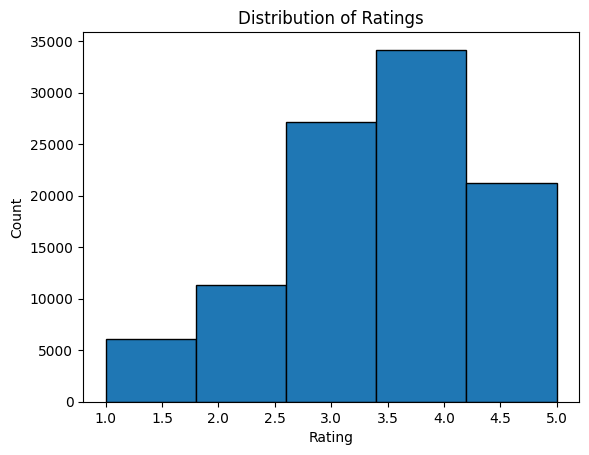

In [13]:
plt.hist(ratings_df["rating"], bins=5, edgecolor="black")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

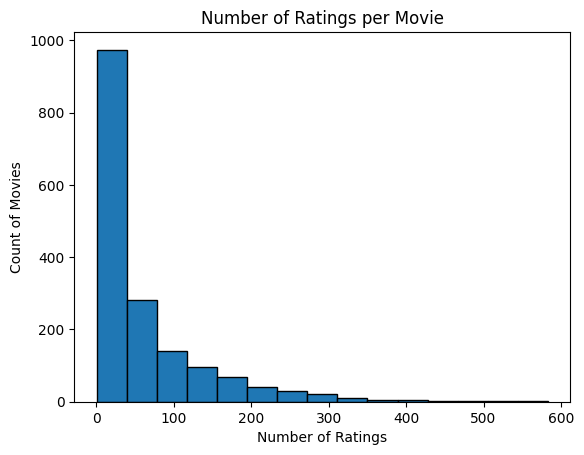

In [14]:
ratings_per_movie = ratings_df.groupby("movie id")["rating"].count()
plt.hist(ratings_per_movie, bins=15, edgecolor="black")
plt.xlabel("Number of Ratings")
plt.ylabel("Count of Movies")
plt.title("Number of Ratings per Movie")
plt.show()

**User Behaviour Analysis**


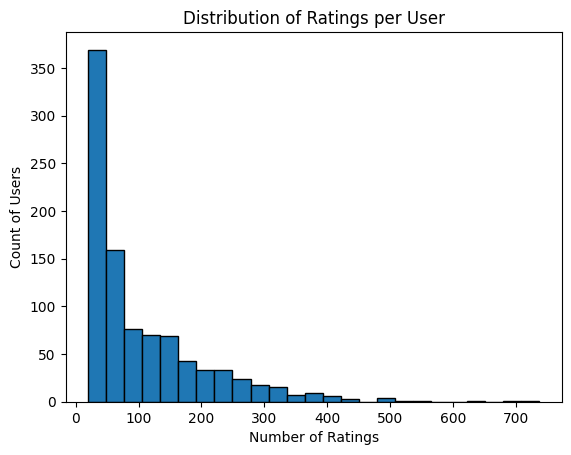

In [15]:
ratings_per_user = ratings_df.groupby("user id")["rating"].count()
plt.hist(ratings_per_user, bins=25, edgecolor="black")
plt.xlabel("Number of Ratings")
plt.ylabel("Count of Users")
plt.title("Distribution of Ratings per User")
plt.show()

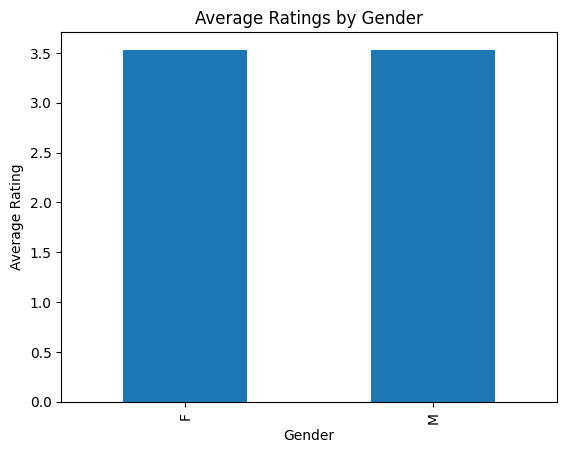

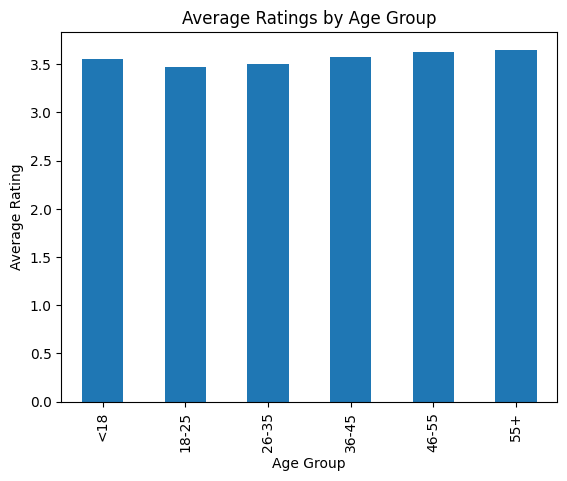

In [16]:
merged_df = pd.merge(ratings_df, users_df, on="user id")
ratings_by_gender = merged_df.groupby("gender")["rating"].mean()

# Define age group categories
age_bins = [0, 18, 25, 35, 45, 55, 100]
age_labels = ["<18", "18-25", "26-35", "36-45", "46-55", "55+"]

merged_df["age_group"] = pd.cut(merged_df["age"], bins=age_bins, labels=age_labels)
ratings_by_age_group = merged_df.groupby("age_group")["rating"].mean()

# Visualize ratings by gender
ratings_by_gender.plot(kind="bar", title="Average Ratings by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Rating")
plt.show()

# Visualize ratings by age group
ratings_by_age_group.plot(kind="bar", title="Average Ratings by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Rating")
plt.show()

**Genre Analysis**


/tmp/ipykernel_20489/3626754942.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  genre_counts = item_df.iloc[:, 4:].sum()


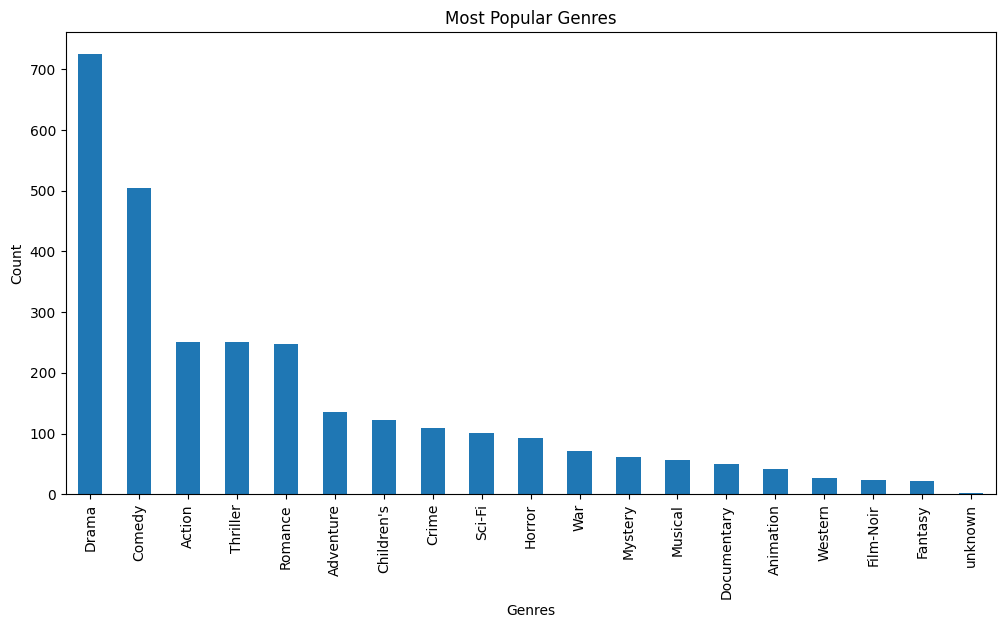

In [17]:
genre_counts = item_df.iloc[:, 4:].sum()
popular_genres = genre_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
popular_genres.plot(kind="bar", title="Most Popular Genres")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.show()

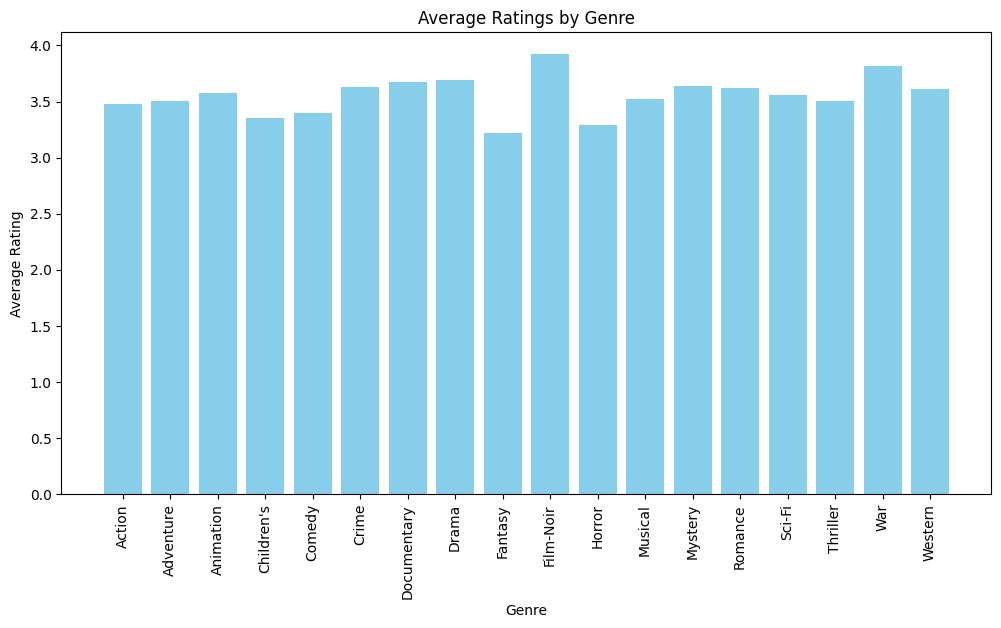

In [18]:
movie_ratings_df = pd.merge(item_df, ratings_df, on="movie id")
average_ratings = movie_ratings_df.groupby("movie id")["rating"].mean()
genre_columns = [
    "Action",
    "Adventure",
    "Animation",
    "Children's",
    "Comedy",
    "Crime",
    "Documentary",
    "Drama",
    "Fantasy",
    "Film-Noir",
    "Horror",
    "Musical",
    "Mystery",
    "Romance",
    "Sci-Fi",
    "Thriller",
    "War",
    "Western",
]

genre_avg_ratings = {}
for genre in genre_columns:
    genre_avg_ratings[genre] = movie_ratings_df[movie_ratings_df[genre] == 1][
        "rating"
    ].mean()

plt.figure(figsize=(12, 6))
plt.bar(genre_avg_ratings.keys(), genre_avg_ratings.values(), color="skyblue")
plt.title("Average Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()

**Temporal Analysis**

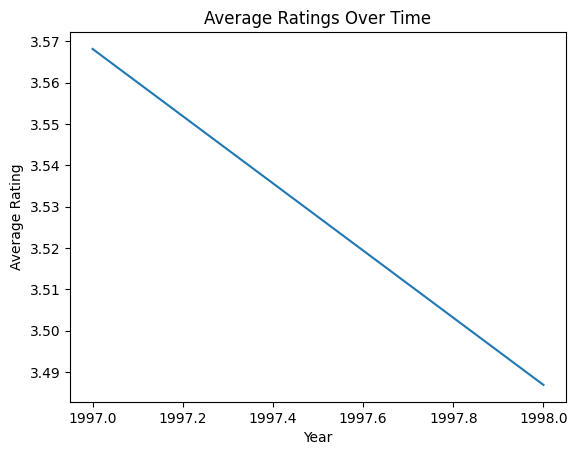

<Figure size 1200x600 with 0 Axes>

In [22]:
ratings_df["timestamp"] = pd.to_datetime(ratings_df["timestamp"], unit="s")
ratings_by_year = ratings_df.groupby(ratings_df["timestamp"].dt.year)["rating"].mean()
ratings_by_year.plot(kind="line", title="Average Ratings Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.figure(figsize=(12, 6))
plt.show()

**Ratings Analysis**

In [ ]:
plt.hist(ratings_df["rating"], bins=9, edgecolor="k", range=(0.5, 5.5))
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.xticks([1, 2, 3, 4, 5])
plt.show()

Since the histogram is skewed towards higher ratings, it suggests that users tend to rate movies more positively.

**Movie Popularity**

In [ ]:
ratings_count = ratings_df.groupby("movie id")["rating"].count()
average_ratings = ratings_df.groupby("movie id")["rating"].mean()
most_popular_by_ratings = ratings_count.sort_values(ascending=False)
most_popular_by_avg_ratings = average_ratings.sort_values(ascending=False)
print("Most popular movie by ratings")
display(most_popular_by_ratings.head(10))
print("Most popular movie by average ratings")
display(most_popular_by_avg_ratings.head(10))

**Basic recommendation system using similarity**

In [ ]:
# User-Movie Ratings Matrix
user_movie_ratings = ratings_df.pivot(
    index="user id", columns="movie id", values="rating"
)
from sklearn.metrics.pairwise import cosine_similarity

# User Similarity
user_similarity = cosine_similarity(user_movie_ratings.fillna(0))
user_similarity_df = pd.DataFrame(
    user_similarity, index=user_movie_ratings.index, columns=user_movie_ratings.index
)

This information can be useful for collaborative filtering-based recommendation system. We can use the user similarity matrix to make movie recommendations for a user based on the preferences of similar users.
For example, to recommend movies for a specific user (e.g., user with user_id 1), we can identify similar users and recommend movies they liked but the target user hasn't seen:

In [ ]:
target_user_id = 1
similar_users = user_similarity_df.loc[target_user_id].sort_values(ascending=False)
recommended_movies = (
    user_movie_ratings.loc[similar_users.index[similar_users.index != target_user_id]]
    .max()
    .sort_values(ascending=False)
)
recommended_movies